# [EX_01] 가위바위보 분류기를 만들자

### 1. 데이터를 준비하자
#### 1.1 데이터 만들기 및 디렉토리 만들기

* 구글의 teachable machine 사이트에서 쉽게 만들 수 있음
* AIFFEL 울산의 노션에 올려진 다른 수강생들의 사진 활용

* 해당 디렉토리에 하위 디렉토리로 가위, 바위, 보 각각의 디렉토리를 만든다
* 각각의 디렉토리 아래에 각각의 이미지를 저장한다
* 하위 디렉토리로 train 디렉토리를 만들어 각각의 이미지 데이터들을 리사이즈하여 저장한다

#### 1.2 데이터 불러오기 + Resize 하기

In [1]:
# 필요한 패키지 및 모듈을 import 한다
from PIL import Image
import glob
import os

print("PIL 라이브러리 import 완료!")

PIL 라이브러리 import 완료!


\# 이미지의 사이즈를 mnist 이미지 사이즈와 동일하게 변경

In [2]:
target_size = (28, 28) # 변환 할 이미지 사이즈를 지정


def resize_images(img_path, cnt = 0):
    images = glob.glob(img_path + "/*.jpg") 
    # 이미지 주소를 입력하여 해당 디렉토리의 모든 이미지를 불러올 수 있게 합니다
    
    print(len(images), " images to be resized.")
        
    for img in images:
        old_img = Image.open(img)
        new_img = old_img.resize(target_size, Image.ANTIALIAS) #타겟 사이즈로 리사이즈
        new_img.save((img_path + '/train/' + str(cnt) + ".jpg"), "JPEG") #리사이즈 된 이미지를 디렉토리에 저장
        cnt += 1  #총 몇개의 이미지가 불러와 졌는지 확인하고 파일 이름을 카운팅숫자로 하기 위함
                    #Also, 이미지의 이름을 순서대로 저장하기 위함

    print(cnt, " images resized.")
    
# 가위 이미지가 저장된 디렉토리의 모든 jpg 파일을 불러옴
image_dir_path_scissor = os.getenv("HOME") + "/aiffel/rock_scissor_paper/scissor" #가위 이미지의 디렉토리 주소
resize_images(image_dir_path_scissor) #위의 함수를 수행합니다.

print("가위 이미지 resize 완료!")

100  images to be resized.
100  images resized.
가위 이미지 resize 완료!


In [3]:
# 가위 이미지와 마찬가지로 바위 및 보 이미지도 resize 해줌
image_dir_path_rock = os.getenv("HOME") + "/aiffel/rock_scissor_paper/rock"
resize_images(image_dir_path_rock)

image_dir_path_paper = os.getenv("HOME") + "/aiffel/rock_scissor_paper/paper"
resize_images(image_dir_path_paper)

100  images to be resized.
100  images resized.
100  images to be resized.
100  images resized.


In [4]:
# 개인 자료 외에 추가 자료를 리사이즈 해주는 함수
def resize_images_add(img_path, cnt):
    
    # 각 폴더 내에 add폴더를 만들어서 추가 이미지를 저장했음
    images = glob.glob(img_path + "/add/*.jpg")

    print(len(images), " images to be resized.")

    for img in images:
        old_img = Image.open(img)
        new_img = old_img.resize(target_size, Image.ANTIALIAS)
        new_img.save(img_path + "/train/" + str(cnt) + '.jpg', "JPEG") # 새로운 이미지 path
        cnt += 1
        
        
    print(cnt - len(images), " images resized. (total data: %d)"%cnt)

# 앞에서 저장한 100.jpg부터 저장하기 위해 count_add를 100으로 지정
image_dir_path_paper_ = os.getenv("HOME") + "/aiffel/rock_scissor_paper/paper"
resize_images_add(image_dir_path_paper_, 100)
image_dir_path_rock_ = os.getenv("HOME") + "/aiffel/rock_scissor_paper/rock"
resize_images_add(image_dir_path_rock_, 100)
image_dir_path_scissor_ = os.getenv("HOME") + "/aiffel/rock_scissor_paper/scissor"
resize_images_add(image_dir_path_scissor_, 100)

100  images to be resized.
100  images resized. (total data: 200)
100  images to be resized.
100  images resized. (total data: 200)
100  images to be resized.
100  images resized. (total data: 200)


In [5]:
import numpy as np

def load_data(img_path, number_of_data=600):
    # 가위: 0, 바위: 1, 보: 2
    img_size = 28
    color = 3
    
    # 이미지 데이터와 레이블 데이터를 담을 행렬을 생성
    imgs = np.zeros(number_of_data * img_size * img_size * color, dtype=np.int32).reshape(number_of_data, img_size, img_size, color)
    labels = np.zeros(number_of_data, dtype=np.int32)
    
    idx = 0
    
    modes = ['scissor', 'rock', 'paper']
    for i, mode in enumerate(modes):
        for file in glob.iglob(img_path + "/" + mode + '/train/' + "/*.jpg"):
            img = np.array(Image.open(file), dtype=np.int32)
            imgs[idx,:,:,:] = img
            labels[idx] = i
            idx += 1

    print("학습 데이터(x_train)의 개수는 {}개 입니다".format(idx))
    return imgs, labels


image_dir_path = os.getenv("HOME") + "/aiffel/rock_scissor_paper"
(x_train, y_train) = load_data(image_dir_path)
x_train_norm = x_train / 255.0  # x_train 값의 범위를 0~1로 정규화
#x_train_norm = (x_train - 127) / 127.0  # x_train 값의 범위를 0~1로 정규화

print("x_train shape: {}".format(x_train.shape))
print("y_train shape: {}".format(y_train.shape))

학습 데이터(x_train)의 개수는 600개 입니다
x_train shape: (600, 28, 28, 3)
y_train shape: (600,)


라벨:  0


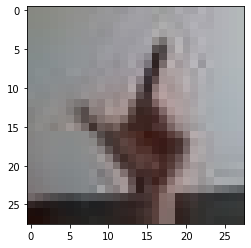

In [6]:
import matplotlib.pyplot as plt

plt.imshow(x_train[0])
print('라벨: ', y_train[0])

### 2. 딥러닝 네트워크 설계하기

In [29]:
import tensorflow as tf
from tensorflow import keras

model = keras.models.Sequential()
model.add(keras.layers.Conv2D(16, (3,3), activation='relu', input_shape=(28, 28, 3)))
model.add(keras.layers.MaxPool2D(2,2))
model.add(keras.layers.Conv2D(32, (3,3), activation='relu'))
model.add(keras.layers.MaxPooling2D(2,2))
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(32, activation='relu'))
model.add(keras.layers.Dense(3, activation='softmax'))

model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_8 (Conv2D)            (None, 26, 26, 16)        448       
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 13, 13, 16)        0         
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 11, 11, 32)        4640      
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 5, 5, 32)          0         
_________________________________________________________________
flatten_4 (Flatten)          (None, 800)               0         
_________________________________________________________________
dense_8 (Dense)              (None, 32)                25632     
_________________________________________________________________
dense_9 (Dense)              (None, 3)                

### 3. 딥러닝 네트워크 학습하기

In [30]:
x_train_reshaped = x_train_norm.reshape(-1, 28, 28, 3)

model.compile(optimizer='adam',
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])
#sparse_categorical_crossentropy
model.fit(x_train_reshaped, y_train, epochs=20)

Epoch 1/20
38/38 [==============================] - 0s 3ms/step - loss: 1.0932 - accuracy: 0.3667
Epoch 2/20
38/38 [==============================] - 0s 3ms/step - loss: 1.0167 - accuracy: 0.5575
Epoch 3/20
38/38 [==============================] - 0s 3ms/step - loss: 0.8423 - accuracy: 0.6942
Epoch 4/20
38/38 [==============================] - 0s 3ms/step - loss: 0.5309 - accuracy: 0.8433
Epoch 5/20
38/38 [==============================] - 0s 3ms/step - loss: 0.2928 - accuracy: 0.9258
Epoch 6/20
38/38 [==============================] - 0s 3ms/step - loss: 0.1725 - accuracy: 0.9742
Epoch 7/20
38/38 [==============================] - 0s 3ms/step - loss: 0.1258 - accuracy: 0.9733
Epoch 8/20
38/38 [==============================] - 0s 3ms/step - loss: 0.0851 - accuracy: 0.9783
Epoch 9/20
38/38 [==============================] - 0s 3ms/step - loss: 0.0578 - accuracy: 0.9933
Epoch 10/20
38/38 [==============================] - 0s 3ms/step - loss: 0.0423 - accuracy: 0.9933
Epoch 11/20
38/38 [

### 4. 얼마나 잘 만들었는지 확인하기(테스트)

In [9]:
def resize_images_test(img_path, cnt = 0):
    images = glob.glob(img_path + "/*.jpg")
    
    print(len(images), " images to be resized.")

    for img in images:
        old_img = Image.open(img)
        new_img = old_img.resize(target_size, Image.ANTIALIAS)
        new_img.save((img_path + '/' + str(cnt) + ".jpg"), "JPEG")
        cnt += 1
        
    print(cnt, " images resized.")

image_dir_path_scissor = os.getenv("HOME") + "/aiffel/rock_scissor_paper/test/scissor"
resize_images_test(image_dir_path_scissor)

image_dir_path_paper = os.getenv("HOME") + "/aiffel/rock_scissor_paper/test/paper"
resize_images_test(image_dir_path_paper)

image_dir_path_rock = os.getenv("HOME") + "/aiffel/rock_scissor_paper/test/rock"
resize_images_test(image_dir_path_rock)

100  images to be resized.
100  images resized.
100  images to be resized.
100  images resized.
100  images to be resized.
100  images resized.


In [11]:
def load_data_test(img_path, number_of_data=600):
    # 가위: 0, 바위: 1, 보: 2
    img_size = 28
    color = 3
    
    # 이미지 데이터와 레이블 데이터를 담을 행렬을 생성
    imgs = np.zeros(number_of_data * img_size * img_size * color, dtype=np.int32).reshape(number_of_data, img_size, img_size, color)
    labels = np.zeros(number_of_data, dtype=np.int32)
    
    idx = 0
    
    modes = ['scissor', 'rock', 'paper']
    for i, mode in enumerate(modes):
        print('레이블: {}, mode: {}'.format(i, mode))
        for file in glob.iglob(img_path + "/" + mode + "/*.jpg"):
            img = np.array(Image.open(file), dtype=np.int32)
            imgs[idx,:,:,:] = img
            labels[idx] = i
            idx += 1

    print("학습 데이터(x_train)의 개수는 {}개 입니다".format(idx))
    return imgs, labels


test_image_dir_path = os.getenv("HOME") + "/aiffel/rock_scissor_paper/test"
(x_test, y_test) = load_data_test(test_image_dir_path)

x_test_norm = x_test / 255.0
#x_test_norm = (x_test - 127) / 127.0

x_test_reshaped = x_test_norm.reshape(-1, 28, 28, 3)

레이블: 0, mode: scissor
레이블: 1, mode: rock
레이블: 2, mode: paper
학습 데이터(x_train)의 개수는 300개 입니다


In [31]:
test_loss, test_accuracy = model.evaluate(x_test_reshaped,y_test, verbose=2)
print("test_loss: {} ".format(test_loss))
print("test_accuracy: {}".format(test_accuracy))

19/19 - 0s - loss: 3.0922 - accuracy: 0.6483
test_loss: 3.092235803604126 
test_accuracy: 0.6483333110809326


model.predict() 결과 :  [9.9764121e-01 3.7727031e-04 1.9816342e-03]
model이 추론한 가장 가능성이 높은 결과 :  0
실제 데이터의 라벨 :  1


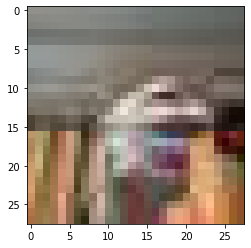

In [13]:
predicted_result = model.predict(x_test_reshaped)  # model이 추론한 확률값. 
predicted_labels = np.argmax(predicted_result, axis=1)

idx=130  #1번째 x_test를 살펴보자. 
print('model.predict() 결과 : ', predicted_result[idx])
print('model이 추론한 가장 가능성이 높은 결과 : ', predicted_labels[idx])
print('실제 데이터의 라벨 : ', y_test[idx])

plt.imshow(x_test[idx],cmap=plt.cm.binary)
plt.show()

잘못 예측한 경우는 총 159개 입니다.
예측확률분포: [9.6098125e-01 2.2979644e-04 3.8788993e-02]
라벨: 1, 예측결과: 0


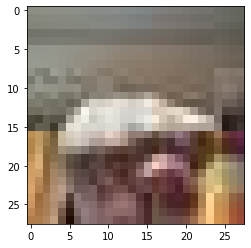

예측확률분포: [4.1599533e-01 8.3878585e-05 5.8392078e-01]
라벨: 1, 예측결과: 2


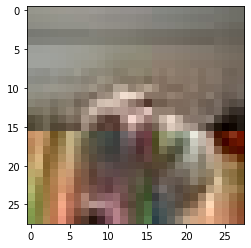

예측확률분포: [9.1721869e-01 2.5799850e-04 8.2523234e-02]
라벨: 1, 예측결과: 0


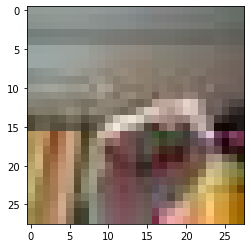

예측확률분포: [9.7761989e-01 2.1649618e-04 2.2163650e-02]
라벨: 1, 예측결과: 0


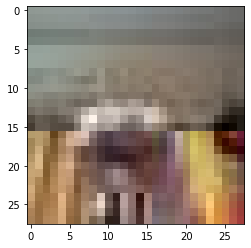

예측확률분포: [0.8194735  0.03948035 0.14104609]
라벨: 2, 예측결과: 0


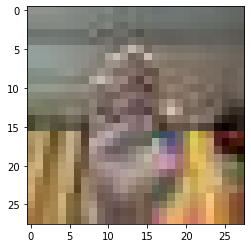

In [14]:
import random
wrong_predict_list=[]
for i, _ in enumerate(predicted_labels):
    # i번째 test_labels과 y_test이 다른 경우만 모아 봅시다. 
    if predicted_labels[i] != y_test[i]:
        wrong_predict_list.append(i)

print('잘못 예측한 경우는 총 {}개 입니다.'.format(len(wrong_predict_list)))
# wrong_predict_list 에서 랜덤하게 5개만 뽑아봅시다.
samples = random.choices(population=wrong_predict_list, k=5)

for n in samples:
    print("예측확률분포: " + str(predicted_result[n]))
    print("라벨: " + str(y_test[n]) + ", 예측결과: " + str(predicted_labels[n]))
    plt.imshow(x_test[n], cmap=plt.cm.binary)
    plt.show()

### 5. 더 좋은 네트워크 만들어보기

* 기본 예제 코드를 이용하여 test 데이터에 대해 다음과 같은 결과를 나타냄
 - loss: 3.0922 
 - accuracy: 0.6483
* 통과 기준이 60%를 조금 넘기며 달성
* 조금 더 나은 네트워크 만들어보기
 1. train 데이터를 90도 회전하여 train에 추가해보기
 2. Conv2D 레이어의 필터수를 키워보기

1. train 데이터를 90도 회전하여 train에 추가해보기

In [15]:
def resize_images_add_rotate(img_path, cnt):
    cnt_org = cnt
    # 각 폴더 내에 add폴더를 만들어서 추가 이미지를 저장했음
    images = glob.glob(img_path + "/add/*.jpg")

    print(len(images), " images to be resized.")

    for img in images:
        old_img = Image.open(img)
        new_img = old_img.resize(target_size, Image.ANTIALIAS).transpose(Image.ROTATE_90) # 이미지를 90도 회전
        new_img.save(img_path + "/train/" + str(cnt) + '.jpg', "JPEG") # 새로운 이미지 path
        cnt += 1
        
        
    print(cnt - cnt_org, " images resized. (total data: %d)"%cnt)
    
image_dir_path_scissor = os.getenv("HOME") + "/aiffel/rock_scissor_paper/scissor" #가위 이미지의 디렉토리 주소
resize_images_add_rotate(image_dir_path_scissor, 200) #현재 200개의 데이터가 있으므로 cnt에 200을 넣어주어 201.jpg부터 저장
image_dir_path_rock = os.getenv("HOME") + "/aiffel/rock_scissor_paper/rock"
resize_images_add_rotate(image_dir_path_rock, 200)
image_dir_path_paper = os.getenv("HOME") + "/aiffel/rock_scissor_paper/paper"
resize_images_add_rotate(image_dir_path_paper, 200)


100  images to be resized.
100  images resized. (total data: 300)
100  images to be resized.
100  images resized. (total data: 300)
100  images to be resized.
100  images resized. (total data: 300)


In [16]:
def resize_images_rotate(img_path, cnt):
    cnt_org = cnt
    # 각 폴더 내에 add폴더를 만들어서 추가 이미지를 저장했음
    images = glob.glob(img_path + "/*.jpg")

    print(len(images), " images to be resized.")

    for img in images:
        old_img = Image.open(img)
        new_img = old_img.resize(target_size, Image.ANTIALIAS).transpose(Image.ROTATE_90) # 이미지를 90도 회전
        new_img.save(img_path + "/train/" + str(cnt) + '.jpg', "JPEG") # 새로운 이미지 path
        cnt += 1
        
        
    print(cnt - cnt_org, " images resized. (total data: %d)"%cnt)

# 앞에서 저장한 100.jpg부터 저장하기 위해 count_add를 100으로 지정
image_dir_path_paper = os.getenv("HOME") + "/aiffel/rock_scissor_paper/paper"
resize_images_rotate(image_dir_path_paper, 300)
image_dir_path_rock = os.getenv("HOME") + "/aiffel/rock_scissor_paper/rock"
resize_images_rotate(image_dir_path_rock, 300)
image_dir_path_scissor = os.getenv("HOME") + "/aiffel/rock_scissor_paper/scissor"
resize_images_rotate(image_dir_path_scissor, 300)

100  images to be resized.
100  images resized. (total data: 400)
100  images to be resized.
100  images resized. (total data: 400)
100  images to be resized.
100  images resized. (total data: 400)


In [17]:
import numpy as np

def load_data(img_path, number_of_data=600):
    # 가위: 0, 바위: 1, 보: 2
    img_size = 28
    color = 3
    
    # 이미지 데이터와 레이블 데이터를 담을 행렬을 생성
    imgs = np.zeros(number_of_data * img_size * img_size * color, dtype=np.int32).reshape(number_of_data, img_size, img_size, color)
    labels = np.zeros(number_of_data, dtype=np.int32)
    
    idx = 0
    
    modes = ['scissor', 'rock', 'paper']
    for i, mode in enumerate(modes):
        for file in glob.iglob(img_path + "/" + mode + '/train/' + "/*.jpg"):
            img = np.array(Image.open(file), dtype=np.int32)
            imgs[idx,:,:,:] = img
            labels[idx] = i
            idx += 1

    print("학습 데이터(x_train)의 개수는 {}개 입니다".format(idx))
    return imgs, labels


image_dir_path = os.getenv("HOME") + "/aiffel/rock_scissor_paper"
(x_train, y_train) = load_data(image_dir_path, 1200)
x_train_norm = x_train / 255.0  # x_train 값의 범위를 0~1로 정규화
#x_train_norm = (x_train - 127) / 127.0  # x_train 값의 범위를 0~1로 정규화

print("x_train shape: {}".format(x_train.shape))
print("y_train shape: {}".format(y_train.shape))

학습 데이터(x_train)의 개수는 1200개 입니다
x_train shape: (1200, 28, 28, 3)
y_train shape: (1200,)


In [23]:
model_1 = keras.models.Sequential()
model_1.add(keras.layers.Conv2D(16, (3,3), activation='relu', input_shape=(28, 28, 3)))
model_1.add(keras.layers.MaxPool2D(2,2))
model_1.add(keras.layers.Conv2D(32, (3,3), activation='relu'))
model_1.add(keras.layers.MaxPooling2D(2,2))
model_1.add(keras.layers.Flatten())
model_1.add(keras.layers.Dense(32, activation='relu'))
model_1.add(keras.layers.Dense(3, activation='softmax'))

model_1.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 26, 26, 16)        448       
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 13, 13, 16)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 11, 11, 32)        4640      
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 5, 5, 32)          0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 800)               0         
_________________________________________________________________
dense_4 (Dense)              (None, 32)                25632     
_________________________________________________________________
dense_5 (Dense)              (None, 3)                

In [24]:
x_train_reshaped = x_train_norm.reshape(-1, 28, 28, 3)

model_1.compile(optimizer='adam',
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])
#sparse_categorical_crossentropy
model_1.fit(x_train_reshaped, y_train, epochs=20)

Epoch 1/20
38/38 [==============================] - 0s 3ms/step - loss: 1.0860 - accuracy: 0.4717
Epoch 2/20
38/38 [==============================] - 0s 3ms/step - loss: 1.0027 - accuracy: 0.5667
Epoch 3/20
38/38 [==============================] - 0s 3ms/step - loss: 0.7944 - accuracy: 0.7617
Epoch 4/20
38/38 [==============================] - 0s 3ms/step - loss: 0.5174 - accuracy: 0.8650
Epoch 5/20
38/38 [==============================] - 0s 3ms/step - loss: 0.3139 - accuracy: 0.9425
Epoch 6/20
38/38 [==============================] - 0s 3ms/step - loss: 0.1854 - accuracy: 0.9750
Epoch 7/20
38/38 [==============================] - 0s 3ms/step - loss: 0.1321 - accuracy: 0.9817
Epoch 8/20
38/38 [==============================] - 0s 3ms/step - loss: 0.0909 - accuracy: 0.9875
Epoch 9/20
38/38 [==============================] - 0s 3ms/step - loss: 0.0649 - accuracy: 0.9942
Epoch 10/20
38/38 [==============================] - 0s 3ms/step - loss: 0.0531 - accuracy: 0.9933
Epoch 11/20
38/38 [

In [46]:
test_loss, test_accuracy = model_1.evaluate(x_test_reshaped,y_test, verbose=2)
print("test_loss: {} ".format(test_loss))
print("test_accuracy: {}".format(test_accuracy))

19/19 - 0s - loss: 5.5873 - accuracy: 0.6900
test_loss: 5.587311267852783 
test_accuracy: 0.6899999976158142


2. Conv2D 레이어의 필터수를 키워보기

In [44]:
model_2 = keras.models.Sequential()
model_2.add(keras.layers.Conv2D(256, (3,3), activation='relu', input_shape=(28, 28, 3)))
model_2.add(keras.layers.MaxPool2D(2,2))
model_2.add(keras.layers.Conv2D(32, (3,3), activation='relu'))
model_2.add(keras.layers.MaxPooling2D(2,2))
model_2.add(keras.layers.Flatten())
model_2.add(keras.layers.Dense(32, activation='relu'))
model_2.add(keras.layers.Dense(3, activation='softmax'))

model_2.summary()

x_train_reshaped = x_train_norm.reshape(-1, 28, 28, 3)

model_2.compile(optimizer='adam',
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])
#sparse_categorical_crossentropy
model_2.fit(x_train_reshaped, y_train, epochs=20)

Model: "sequential_11"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_22 (Conv2D)           (None, 26, 26, 256)       7168      
_________________________________________________________________
max_pooling2d_22 (MaxPooling (None, 13, 13, 256)       0         
_________________________________________________________________
conv2d_23 (Conv2D)           (None, 11, 11, 32)        73760     
_________________________________________________________________
max_pooling2d_23 (MaxPooling (None, 5, 5, 32)          0         
_________________________________________________________________
flatten_11 (Flatten)         (None, 800)               0         
_________________________________________________________________
dense_22 (Dense)             (None, 32)                25632     
_________________________________________________________________
dense_23 (Dense)             (None, 3)               

In [45]:
test_loss, test_accuracy = model_2.evaluate(x_test_reshaped,y_test, verbose=2)
print("test_loss: {} ".format(test_loss))
print("test_accuracy: {}".format(test_accuracy))

19/19 - 0s - loss: 2.9265 - accuracy: 0.6967
test_loss: 2.926525354385376 
test_accuracy: 0.6966666579246521


### 6. 회고

* 두 가지 방법으로 네트워크를 더욱 좋게 만들어 보려고 했습니다.  
분명 조금은 향상된 결과를 보이긴 했으나 여전히 loss 값이 높게 나타나는 것을 볼 수 있습니다.
* 네트워크 성능이 크게 향상되지 않은 이유로
 1. 테스트 데이터의 입력 이미지가 눈으로 보아도 구분이 어려운 것이 많음
 2. 입력 데이터의 크기가 28x28로 매우 작기때문에 이미지에서 뽑아낼 수 있는 feature가 많이 않았을 것
 3. 학습 데이터의 수가 변경된 네트워크에서 총 1200장이었으므로 학습에 충분한 양이라고 보기 어려움
 특히 1번의 이유가 가장 크지 않을까 생각됩니다. 배경이 깨끗하지 못하기에 손의 모양을 구분하는 것이 어렵다고 생각합니다.  
---  
  
* 딥러닝을 네트워크부터 작성하는 것이 처음이었습니다. 그러나 라이브러리를 활용하니 큰 어려움 없이 구현할 수 있었습니다.  
해당 프로젝트에서 어려웠던 점은 데이터들의 사이즈를 맞춰주는 것이었습니다. numpy의 array활용법을 더 공부해야할 것 같습니다.  
또한 이미지를 출력해주는 방법에 대해서도 앞으로의 과정에 있어 매우 중요해보입니다.  
직접 눈으로 확인해보는 것 만큼 좋은 방법은 없기에, 이미지를 출력하는 방법에 대해서는 숙달이 필요할 것 같습니다.  
처음 한 과제치고는 어렵지는 않았지만, 생각해보아야 할 것들이 많은 과제였습니다.